In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

LOADING DATA

In [3]:
daily_data = pd.read_csv('daily_data.csv')

In [4]:
daily_data = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['SOD', 'PRECIP', 'other_non_numeric_values'])

In [17]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   STATION                                     2668 non-null   int64         
 1   DATE                                        2668 non-null   datetime64[ns]
 2   REPORT_TYPE                                 2668 non-null   object        
 3   SOURCE                                      2668 non-null   int64         
 4   BackupElements                              2668 non-null   object        
 5   BackupElevation                             2668 non-null   int64         
 6   BackupEquipment                             2668 non-null   object        
 7   BackupLatitude                              2668 non-null   float64       
 8   BackupLongitude                             2668 non-null   float64       
 9   BackupNa

In [5]:
print("Daily Data:")
print(daily_data.head())

Daily Data:
       STATION                DATE REPORT_TYPE  SOURCE  BackupElements  \
0  72518014735 2015-01-01 23:59:00       SOD         6             NaN   
1  72518014735 2015-01-02 23:59:00       SOD         6             NaN   
2  72518014735 2015-01-03 23:59:00       SOD         6             NaN   
3  72518014735 2015-01-04 23:59:00       SOD         6             NaN   
4  72518014735 2015-01-05 23:59:00       SOD         6             NaN   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0

In [6]:
print("\nBasic Statistics:")
print(daily_data.describe())


Basic Statistics:
            STATION  SOURCE  BackupElements  BackupElevation  BackupLatitude  \
count  2.668000e+03  2668.0             0.0           2668.0     2668.000000   
mean   7.251801e+10     6.0             NaN            260.0       42.689750   
std    0.000000e+00     0.0             NaN              0.0        0.004187   
min    7.251801e+10     6.0             NaN            260.0       42.681200   
25%    7.251801e+10     6.0             NaN            260.0       42.691800   
50%    7.251801e+10     6.0             NaN            260.0       42.691800   
75%    7.251801e+10     6.0             NaN            260.0       42.691800   
max    7.251801e+10     6.0             NaN            260.0       42.691800   

       BackupLongitude  DailyAverageDewPointTemperature  \
count      2668.000000                      2668.000000   
mean        -73.828268                        38.217766   
std           0.005764                        19.116250   
min         -73.831090  

In [19]:
daily_data.isnull().sum()

STATION                                         0
DATE                                            0
REPORT_TYPE                                     0
SOURCE                                          0
BackupElements                                  0
BackupElevation                                 0
BackupEquipment                                 0
BackupLatitude                                  0
BackupLongitude                                 0
BackupName                                      0
DailyAverageDewPointTemperature                 0
DailyAverageDryBulbTemperature                  0
DailyAverageRelativeHumidity                    0
DailyAverageSeaLevelPressure                    0
DailyAverageStationPressure                     0
DailyAverageWetBulbTemperature                  0
DailyAverageWindSpeed                           0
DailyCoolingDegreeDays                          0
DailyDepartureFromNormalAverageTemperature      0
DailyHeatingDegreeDays                          0


In [20]:
daily_data.shape 

(2668, 33)

In [7]:
# Load the daily dataset
daily_data = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])
# Create a new column for the month
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature and precipitation per month
monthly_aggregations = daily_data.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})

# Display monthly aggregations
print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [8]:
average_daily_temperature = daily_data.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()
print("Average Daily Temperature:")
print(average_daily_temperature)

Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


In [9]:
# Identify days with extreme temperatures (e.g., above 90°F)
extreme_temperature_days = daily_data[daily_data['DailyMaximumDryBulbTemperature'] > 90]

# Display information about extreme temperature days
print("Extreme Temperature Days:")
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

Extreme Temperature Days:
                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


DATA VISUALIZATION 

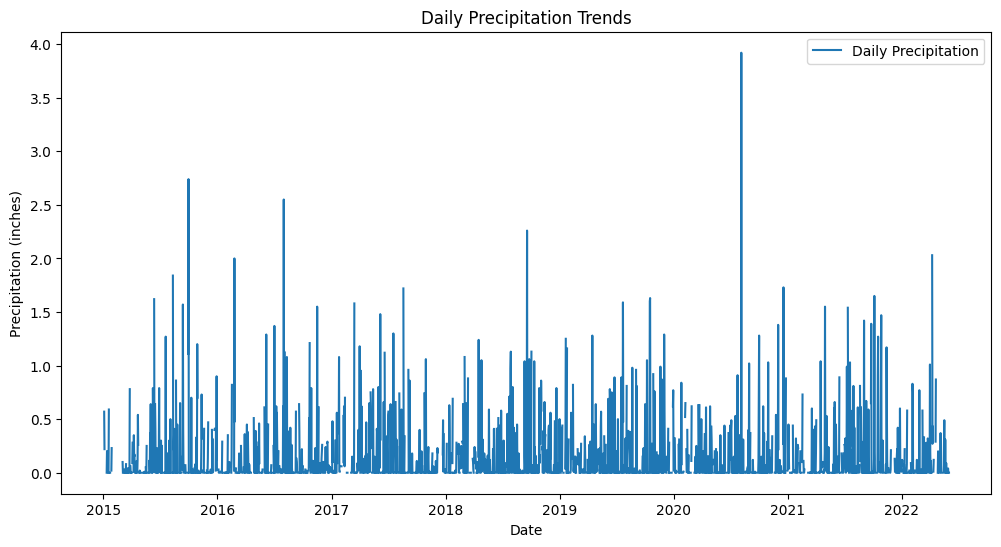

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

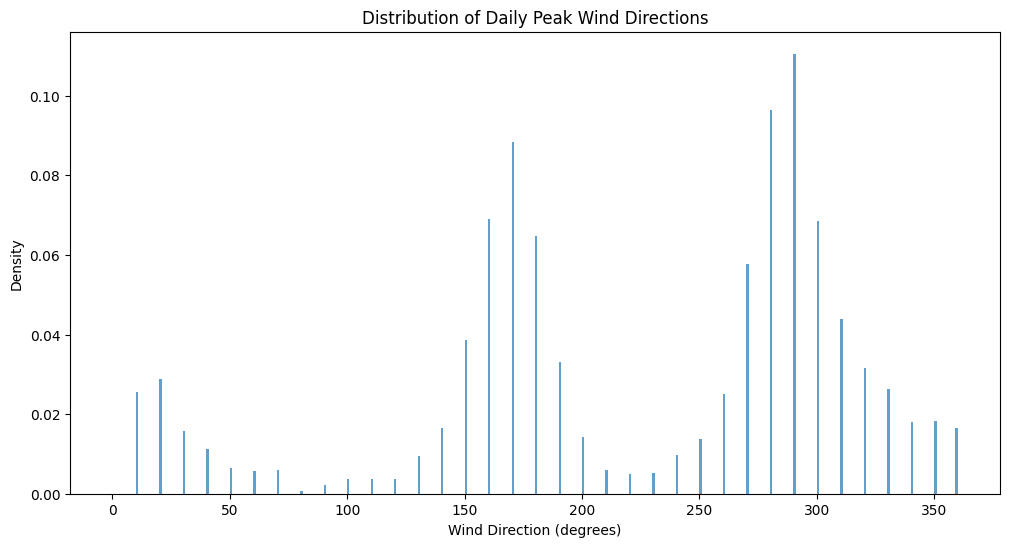

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()

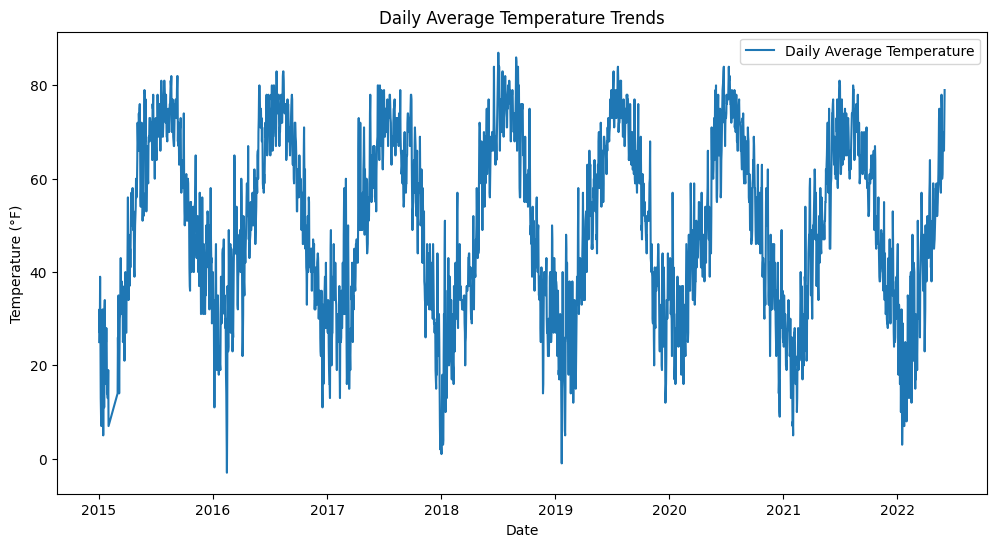

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

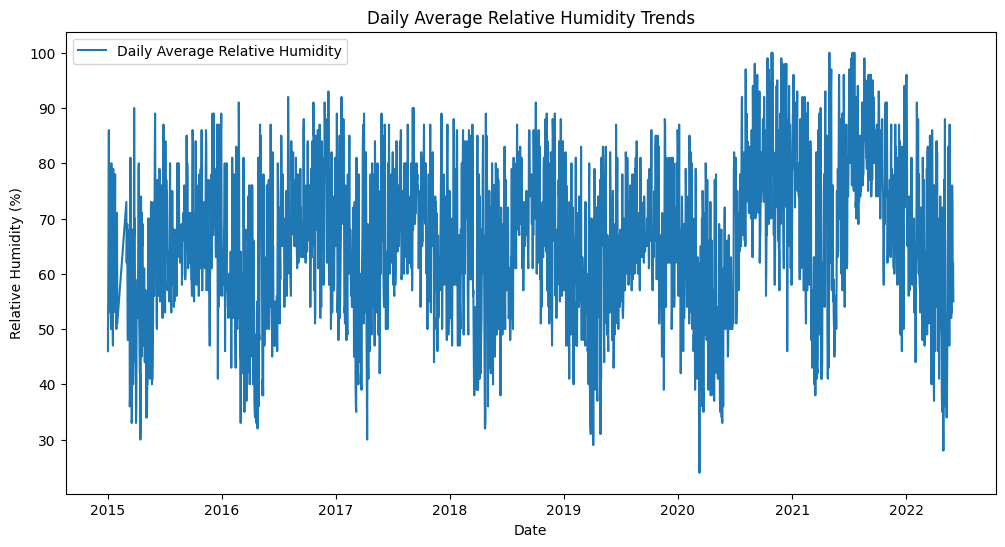

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageRelativeHumidity'], label='Daily Average Relative Humidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

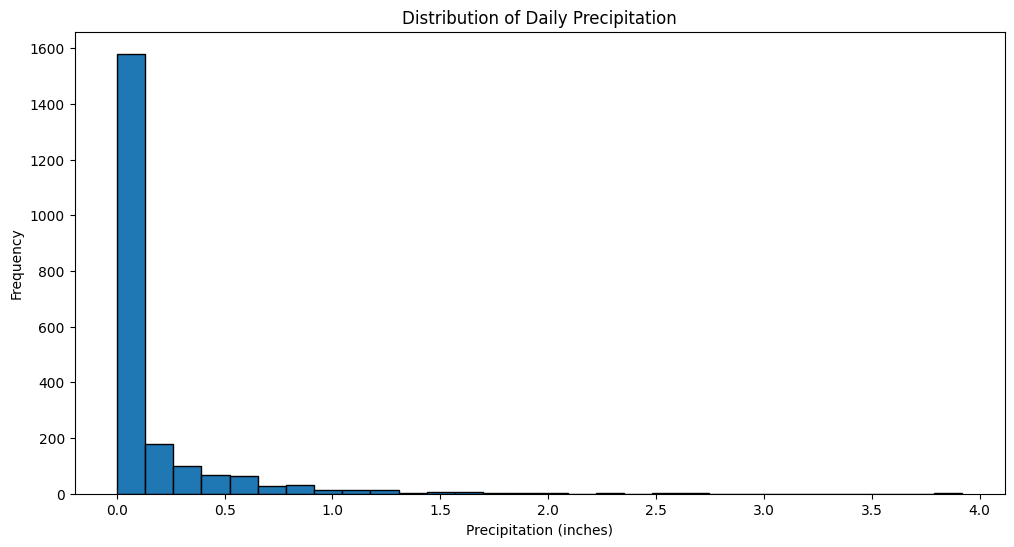

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPrecipitation'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

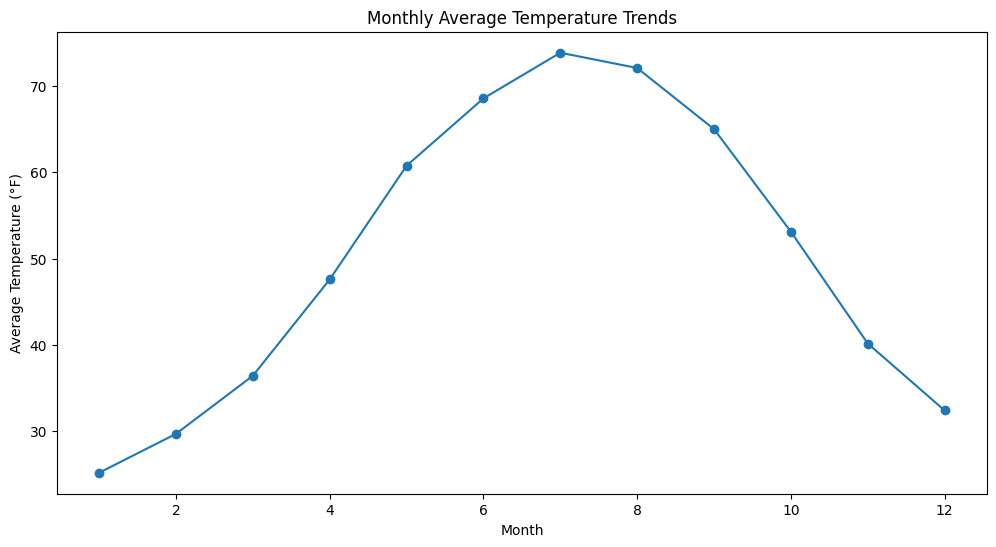

In [15]:
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature per month
monthly_temperature = daily_data.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

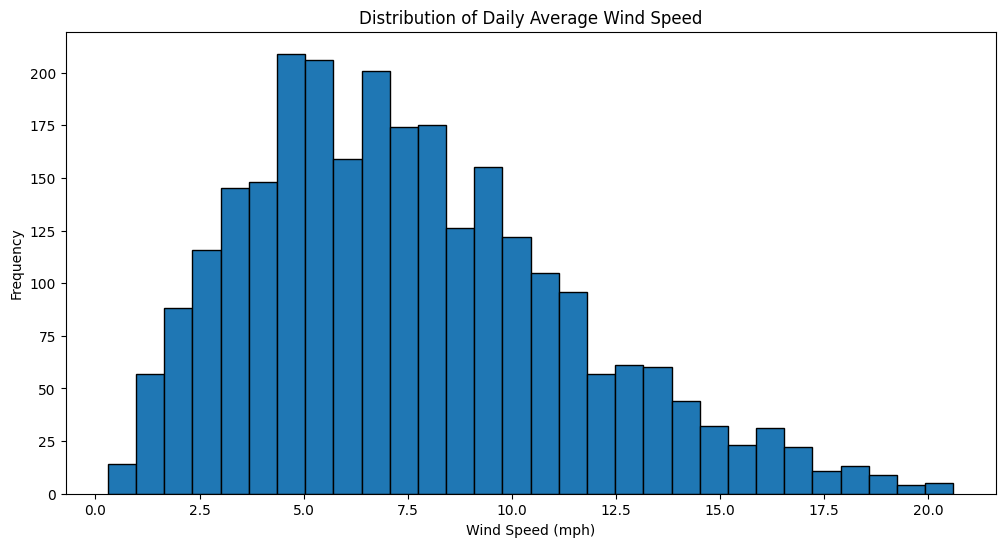

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyAverageWindSpeed'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

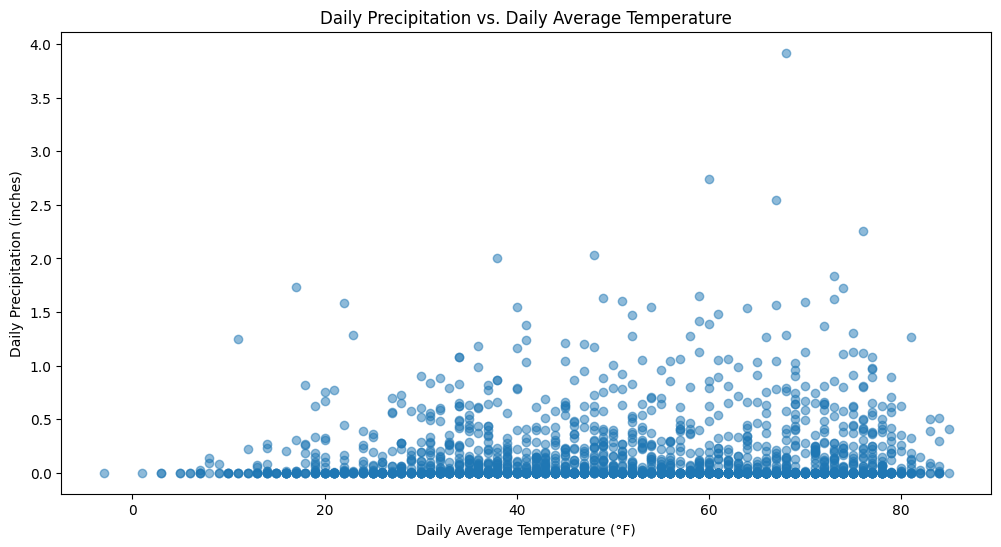

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['DailyAverageDryBulbTemperature'], daily_data['DailyPrecipitation'], alpha=0.5)
plt.title('Daily Precipitation vs. Daily Average Temperature')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')
plt.show()